In [1]:
import numpy as np
import xarray as xr
from modules.crank_nicholson import crank_nicholson_1D
from modules.classes import Quantity1D, Analytic
import matplotlib.pyplot as plt
from scipy.linalg import solve, solve_banded

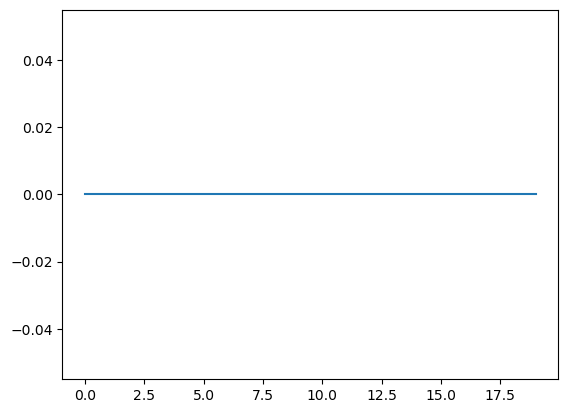

In [9]:
# Initialize a constant diffusion coefficient function
diffusion = Analytic(lambda x, y: 0.001)
diffusion.set_partial_x(lambda x, y: 0)
# Initialize the concentration object
# Note: Von Neumann Stability condition is (D * dt)/dx**2 < 0.5, else spurious decaying oscillations occur
n_grid = 20
n_time = 50
dt = 0.0001
dx = 0.001
conc = Quantity1D(
    n_grid,
    n_time,
    (0, n_grid*dx),
    (0, dt*n_time),
)
xcoords = conc.xcoords
#initial_condition =  10*np.exp(- (10*n_grid*dx)*(xcoords - 0.5*dx*n_grid)**2)
initial_condition = np.zeros_like(xcoords)
#initial_condition[n_grid//2] = 100
sources = np.zeros_like(xcoords)
sinks = np.zeros_like(xcoords)
sources[8] = 10
sinks[11] = 5
plt.plot(initial_condition)

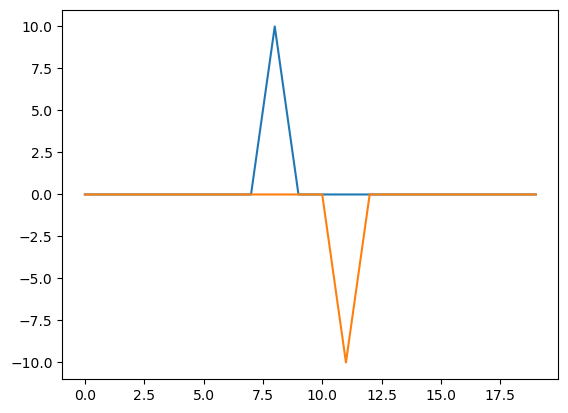

In [10]:
plt.plot(sources)
plt.plot(-sinks)

In [4]:
result_ds = crank_nicholson_1D(conc, diffusion, initial_condition, sources)

[[-1.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.04604592  1.09209184 -0.04604592  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.         -0.04604592  1.09209184 -0.04604592  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -0.04604592  1.09209184 -0.04604592  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.         -0.04604592  1.09209184 -0.04604592
   0.          0.         

In [5]:
result_ds

<xarray.DataArray 'concentration' (x: 20, t: 50)> Size: 8kB
array([[ 0.00000000e+00,  2.29719996e-09, -1.81272776e-08,
        -4.21457501e-07, -3.09837598e-06, -1.42191720e-05,
        -4.86298659e-05, -1.35216815e-04, -3.22205780e-04,
        -6.81488526e-04, -1.31140609e-03, -2.33776146e-03,
        -3.91310656e-03, -6.21452933e-03, -9.44026468e-03,
        -1.38054859e-02, -1.95376209e-02, -2.68714992e-02,
        -3.60445805e-02, -4.72924591e-02, -6.08447828e-02,
        -7.69216751e-02, -9.57307074e-02, -1.17464435e-01,
        -1.42298483e-01, -1.70390156e-01, -2.01877519e-01,
        -2.36878912e-01, -2.75492827e-01, -3.17798114e-01,
        -3.63854441e-01, -4.13702971e-01, -4.67367215e-01,
        -5.24853998e-01, -5.86154531e-01, -6.51245532e-01,
        -7.20090388e-01, -7.92640320e-01, -8.68835547e-01,
        -9.48606424e-01, -1.03187454e+00, -1.11855380e+00,
        -1.20855140e+00, -1.30176880e+00, -1.39810263e+00,
        -1.49744551e+00, -1.59968684e+00, -1.70471351e+00,
        -1.81241055e+00, -1.92266176e+00],
       [ 0.00000000e+00,  2.29719996e-09,  3.17620513e-08,
         2.18443979e-07,  1.00576907e-06,  3.51942401e-06,
         1.00644586e-05,  2.46632513e-05,  5.35371188e-05,
...
        -3.10034144e-01, -3.28192707e-01, -3.46624497e-01,
        -3.65305359e-01, -3.84211858e-01, -4.03321312e-01,
        -4.22611825e-01, -4.42062304e-01],
       [ 0.00000000e+00, -5.43866991e-08,  5.29124150e-07,
         9.08970382e-06,  5.59021076e-05,  2.19214157e-04,
         6.49542654e-04,  1.58460705e-03,  3.35232058e-03,
         6.36340227e-03,  1.10966184e-02,  1.80797973e-02,
         2.78693001e-02,  4.10299701e-02,  5.81169248e-02,
         7.96599923e-02,  1.06151154e-01,  1.38035037e-01,
         1.75702285e-01,  2.19485521e-01,  2.69657521e-01,
         3.26431237e-01,  3.89961282e-01,  4.60346541e-01,
         5.37633598e-01,  6.21820726e-01,  7.12862213e-01,
         8.10672845e-01,  9.15132416e-01,  1.02609015e+00,
         1.14336896e+00,  1.26676945e+00,  1.39607371e+00,
         1.53104878e+00,  1.67144985e+00,  1.81702312e+00,
         1.96750841e+00,  2.12264146e+00,  2.28215601e+00,
         2.44578556e+00,  2.61326495e+00,  2.78433169e+00,
         2.95872715e+00,  3.13619749e+00,  3.31649452e+00,
         3.49937634e+00,  3.68460787e+00,  3.87196135e+00,
         4.06121656e+00,  4.25216114e+00]])
Coordinates:
  * x        (x) float64 160B 0.0 0.001053 0.002105 ... 0.01789 0.01895 0.02
  * t        (t) float64 400B 0.0 0.000102 0.0002041 ... 0.004796 0.004898 0.005
Attributes:
    dx:                      0.0010526315789473684
    dt:                      0.00010204081632653062
    n_grid:                  20
    n_time:                  50
    initial_condition:       [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0....
    sources:                 [  0.   0.   0.   0.   0.   0.   0.   0.  10.   ...
    diffusion_coefficients:  0.001
    metadata:                Generated by crank_nicholson_1D

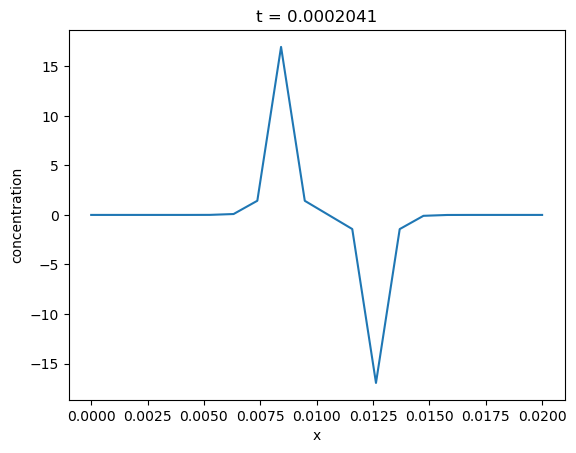

In [6]:
result_ds.isel(t=2).plot()

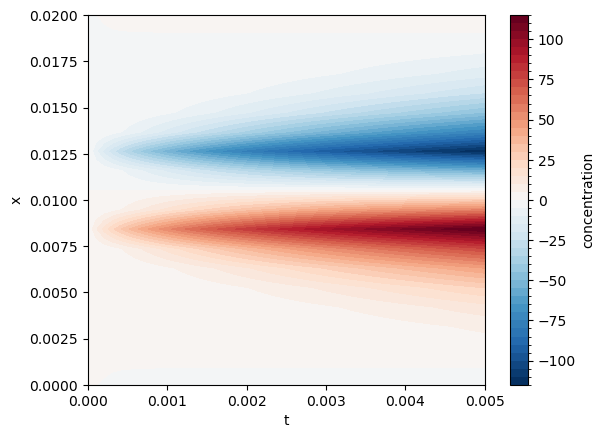

In [7]:
result_ds.plot.contourf(levels=50)